# Helicity as a discriminator in a search for charged Higgs bosons

The goal of this exercise is to use theoretical knowledge of helicity to help us in an experimental analysis. 

Helsinki Institute of Physics is involved in a search for charged Higgs bosons in the CMS collaboration. If one adds a second scalar doublet to the standard model, we get in total five physical Higgs bosons. Three of them are neutral and two have an electrical charge. Models predicting these bosons are called *two-Higgs-doublet models* and they are the first step towards for instance supersymmetry and therefore an observation of a charged Higgs boson would be clear evidence of beyond the standard model theories. 

We will use two simulated data sets in our analysis: 

- Charged Higgs boson signal sample
- W + jet background sample 

With these we will study the decay of charged Higgs bosons into a tau lepton and a tau neutrino.


When searching for new particles, we need to impose cuts to data to increase the signal over background ratio. Signal over background ratio tells us how much signal and background we have after a cut. In other words when we impose a cut, we usually cut background but also some signal. We want to make sure that every cut takes a small amount of signal away and a large amount of background away. 

The helicity of tau leptons carries information about their origin, so it provides a useful handle for discrimination between the tau leptons originating from charged Higgs boson decays and those originating from a W decays. Therefore, we will use a variable called R_tau to discriminate between the signal and the background in this exercise. 

Neutrinos are always left-handed in the standard model. Tau leptons produced in a charged Higgs bosons decay are therefore always right-handed since a charged Higgs boson is a scalar particle. On the other hand (pun intended), when a vector boson W decays into a tau lepton, the tau lepton is forced to be left-handed since the neutrino is left-handed. It turns out that this influences the kinematics of the tau lepton decay. An emission of the leading track particle is more likely to be towards the tau lepton's direction of movement for the right-handed tau. Therefore in laboratory coordinates the leading tracks originally caused by the decay of the charged Higgs boson have on average a larger momentum than the ones caused by the decay of the W boson.

R_tau is defined as the the leading track pT of a tau lepton divided by the pT of the tau lepton.

From the data files Hplus.csv and WJet.csv you can calculate the R_tau with variables: 

R_tau = LeadingTrackPt/TauPt

This week's task is to find an optimal value for the R_tau that cuts the background without taking too much of the signal away. 

We begin with reading the data sets. Your first task is to calculate the R_tau values for both Hplus and Wjet data. Return the averages for both data sets. 

The data are in files Hplus.csv and WJet.csv.

In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data sets Hplus_M_90.pkl and Wjets.pkl from the 'Data' folder
# Calculate the average values of R_tau for both data sets.

Hplus = pd.read_csv('Hplus.csv')

Wjet = pd.read_csv('WJet.csv')

print(Wjet.TauPt)
print(Wjet.LeadingTrackPt)

R_tau_hplus = Hplus.LeadingTrackPt/Hplus.TauPt
R_tau_wjet = Wjet.LeadingTrackPt/Wjet.TauPt


print(np.average(R_tau_hplus))
print(np.average(R_tau_wjet))

0        135.230743
1        117.195907
2         44.550690
3         18.906328
4         76.997918
            ...    
15121    120.380213
15122     92.728636
15123     40.523099
15124     40.179325
15125    100.828178
Name: TauPt, Length: 15126, dtype: float64
0        57.40625
1        55.03125
2        44.78125
3        17.43750
4        77.37500
           ...   
15121    18.59375
15122    48.84375
15123    17.28125
15124    32.81250
15125    28.15625
Name: LeadingTrackPt, Length: 15126, dtype: float64
0.6179141287931099
0.5869992119323307


Next, use the R_tau distributions you obtained in the previous part and plot both of the datasets in a histogram.

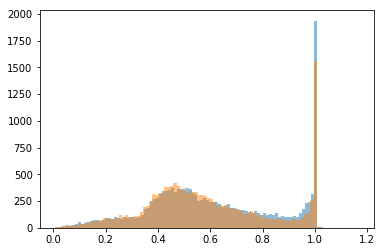

In [19]:
plt.hist(hplus_flat, alpha=0.5, bins=100)
plt.hist(wjet_flat, alpha=0.5, bins=100)
plt.show()

**Question:** Which of the following is true?

1) The difference between the distributions can mainly be seen in the very lowest values of R_tau.

2) The difference between the distributions can mainly be seen in the very highest values of R_tau.

3) The distributions have the same overall shape but the Hplus one is shifted to the right.

-----------------------------------------------------------------------------------------------

Now, we will find the optimal R_tau cut that gives us the best purity.
Use as the purity (or as the signal to background ratio) the number of signal events divided by the number of background events:

P = (number of signal events after the cut)/(number of background events after the cut)

Iterate over different R_tau cut values to find the optimal purity. Calculate the purity always only for the events that have a higher R_tau value than the cut. Return the optimal cut and the purity obtained with it.

In [35]:
# Loop over possible cut values and  get the one with the best ratio of signal to background
best_purity = 0
optimal_cut = 0
for cut in np.linspace(0.02, 1.15, num=1140):
    n_hplus = sum(1 for i in hplus_flat if i > cut)
    n_wjet = sum(1 for i in wjet_flat if i > cut)
    purity = n_hplus/n_wjet
    if purity>best_purity:
        best_purity = purity
        optimal_cut = cut

print('The optimal cut is', round(optimal_cut, 5))
print('It gives the purity of', best_purity)
# The same purity is also achieved with some other cuts nearby

The optimal cut is 1.0746
It gives the purity of 3.0
